# Machine Learning - Image Processing

#### Malgorzata Z. Makos, Richa Mahajan,  Farbod Tavakkoli

based on: Eric Larson's course at SMU, Fall 2019, https://github.com/eclarson/MachineLearningNotebooks

# Business Understanding

### Data Set Overview
In recent years, the growing popularization of social media has propelled machine learning and deep learning to develop tools for picture recognition. Nowadays, we can experience tools, such as the face recognition used by Google, Facebook, etc. These and many other media have innumerable image resources that were shared by their users, thus providing a great big data resource for researchers and corporate alike to dig into.

Among the other websites, Kaggle provides various datasets for students and researchers to work with. Using Kaggle we searched for the images dataset that can be a good fit for this project. Originally our dataset contained around 2700 images of flowers collected from Kaggle. 
The pictures are divided within the following subfolders (classes): Rose, Daisy, Tulips, and Sunflowers. Each class contains approximately 700 images with different proportions and resolutions.

Because of computational time, we have randomly selected 250 images from each class, obtaining total 1000 images. For each image, we desaturated it and resized it into 120x120 size for ease of processing.

The goal of this project is to create an effective flower identification algorithm that can recognize a flower from a photo.

### The Purpose of the Data Set
Flowers are important for the natural environment and eco-system. They are mostly used to aid in plant reproduction.
Flower recognition has a lot of applications including research, environment, and business. 
The flower recognition algorithm can be used to recognize endangered flowers, to distinguish between poisonous and non-poisonous flowers and also to identify ones that cause allergies. 

The number of flower species that have become endangered has significantly increased during the past 10 years.  To slow down or even reverse the process, one has to first recognize the endangered flower and then provide "a good care" for further planting.  To study these species, we need the knowledge of type of species that are endangered and even the places they are still in so that they can be preserved. Scientists have limited access to the places where endangered flowers grow and people usually do not have the ability to recognize endangered flowers when they see one. 

The flowers recognition is also important to recognize flowers of the herbs that have healing ability(or poisonous characteristics). There are professionals who spend so much time exploring the forests to study the vegetation. The problem is that some rare herbs grow in very dangerous places. Having some knowledge about their existence can help save time spent in this research while also reducing unnecessary risks associated with exploring dangerous places. This can be achieved by sending in a drone to capture the capture videos while flying along different routes. These videos can then be checked using the flower identification algorithm to see if a new species is discovered.This risk-free survey of potential rare herbs can greatly increase the success rate of gathering these herbs and decrease risk at the same time. Being able to identify flowers makes the work more efficient. Therefore, Flower classification would offer unusual solutions.  


### Evaluation Criteria
For flower recognition, the algorithm success rate should be around 80-85% when algorithm is used for finding endangered species but not in cases where we are trying to classify poisonous flowers. Lower rate would be acceptable in some cases, for example, if a human expert can provide further analysis.<br>
There are two main challenges we should consider for getting the perfect identification. The first challenge is quality of the picture. Flowers mostly grow in forest and gardens which means it will be really difficult to get the images of the flowers excluding its surroundings. This issue can be taken care of by cropping the images to get just the flowers in it and removing the surrounding unwanted part, but that would take a lot of pre processing, so for this project we are working with the original images.<br> 
The second challenge here would be the proportion of the Region of Interest(i.e the flowers in the picture). Taking a picture of the flowers from  far might make some flowers look completely indistinguishable from some other flowers. 
This increases the difficulty in analyzing the flower features since the effective resolution for the algorithm becomes quite low, thus more prone to misclassifications. 
From recent research activities, the usual flower identification success rate is found to be around 85%. So it would be reasonable for us to set 80-85% success rate of our flower identification algorithm.

In the below code, we are importing the necessary modules that we will need in this project.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import os
import cv2
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2grey as r2g
from skimage.transform import resize as resize
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

### Reading in Images

Here, we are reading in our images from the dataset which is saved in the folder "flowers". There are 4 subfolders in it which are rose, daisy, tulip, and sunflower.

In [2]:
# List all classes' images
rose = os.listdir('flowers/rose')
daisy = os.listdir('flowers/daisy')
tulip = os.listdir('flowers/tulip')
sunflower = os.listdir('flowers/sunflower')

# check all the filenames have been properly read in
print(len(rose), len(tulip), len(daisy), len(sunflower))
rose[0:10]

640 880 658 580


['.DS_Store',
 '10090824183_d02c613f10_m.jpg',
 '102501987_3cdb8e5394_n.jpg',
 '10503217854_e66a804309.jpg',
 '110472418_87b6a3aa98_m.jpg',
 '11233672494_d8bf0a3dbf_n.jpg',
 '118974357_0faa23cce9_n.jpg',
 '11944957684_2cc806276e.jpg',
 '12202373204_34fb07205b.jpg',
 '12238827553_cf427bfd51_n.jpg']

### Resizing, Recoloring and vectorizing the images into 1D features

Now we will select 250 images from each of the 4 categories of flowers. We will then recolor it and convert it into greyscale. We will then resize it so that all the images in the dataset have the same dimension. We convert these images such that each image is a 1D row vector.<br> We then check the shape of the array containing all the images to make sure that it has all the data.

In [3]:
import matplotlib.image as mpimg
#from PIL import Image

h = 120
w = 120
data = []
O_img = []
o_img = []
or_img = []
labels = []

for i in range(250):

    img=mpimg.imread('flowers/rose/'+ rose[i+1])
    o_img.append(img) #adding images to the list of color images
    
    O_img = cv2.resize(img,(120,120))
    or_img.append(O_img)
    
    img_grey = r2g(img)
    
    img_resize = resize(img_grey, (h, w))
    imgX = img_resize.reshape(h*w)
    data.append(imgX)
    
    labels.append('Rose')

for i in range(250):
    img=mpimg.imread('flowers/daisy/'+ daisy[i+1])
    o_img.append(img)
    
    O_img = cv2.resize(img,(120,120))
    or_img.append(O_img)
    
    img_grey = r2g(img)
    
    img_resize = resize(img_grey, (h, w))
    imgX = img_resize.reshape(h*w)
    data.append(imgX)
    
    labels.append('Daisy')
    
for i in range(250):
    img=mpimg.imread('flowers/tulip/'+ tulip[i+1])
    o_img.append(img)
    
    O_img = cv2.resize(img,(120,120))
    or_img.append(O_img)
    
    img_grey = r2g(img)
    
    img_resize = resize(img_grey, (h, w))
    imgX = img_resize.reshape(h*w)
    data.append(imgX)
    
    labels.append('Tulip')

for i in range(250):
    img=mpimg.imread('flowers/sunflower/'+ sunflower[i+1])
    o_img.append(img)
    
    O_img = cv2.resize(img,(120,120))
    or_img.append(O_img)
   
    img_grey = r2g(img)
    
    img_resize = resize(img_grey, (h, w))
    imgX = img_resize.reshape(h*w)
    data.append(imgX)
    
    labels.append('Sunflower')

X = np.asarray(data)
labels = np.asarray(labels)

# check the shape of the data to verify everything is in good shape
print(X.shape)
print(labels.shape)
print(or_img[1].shape)

(1000, 14400)
(1000,)
(120, 120, 3)


### Visualizing several Images

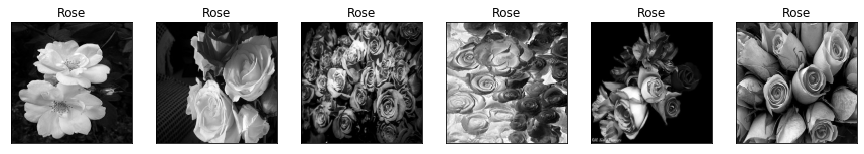

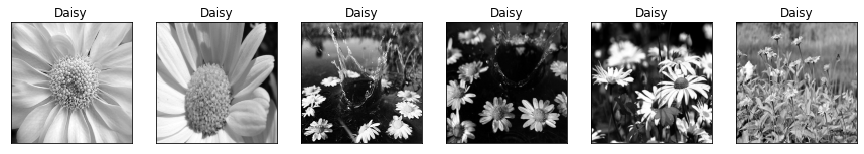

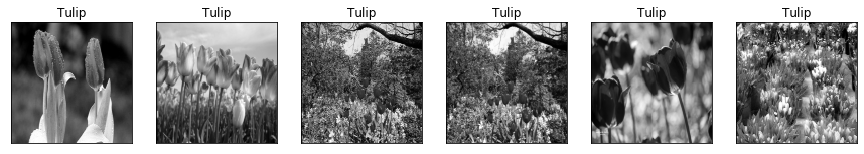

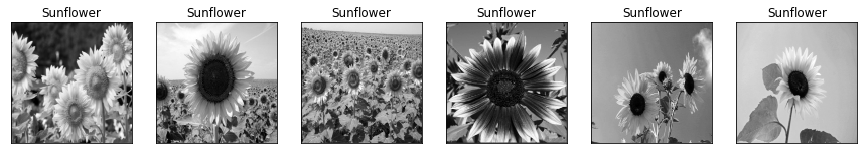

In [4]:
# a helper plotting function
#labels = label_names[label[:]]

def plot_gallery(images, titles, h, w, n_row=1, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(2 * n_col, 3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        #names = ilabel[i]
        
plot_gallery(X[labels == "Rose"], labels, h, w) # defaults to showing a 1 by 6 subset of the images
plot_gallery(X[labels == "Daisy"], labels[250:256], h, w)
plot_gallery(X[labels == "Tulip"], labels[500:506], h, w)
plot_gallery(X[labels == "Sunflower"], labels[750:756], h, w)

# Data Reduction

## PCA linear Dimensionality Reduction

In [5]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

X1 = X
Labels = labels
n_samples, n_features = X.shape
n_components = 250
print ("Extracting the top %d eigenvectors from %d images" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X1.copy())
eigenvectors = pca.components_.reshape((n_components, h, w))

Extracting the top 250 eigenvectors from 1000 images
CPU times: user 12.1 s, sys: 662 ms, total: 12.8 s
Wall time: 6.85 s


### Visualizing explained variance of each Component

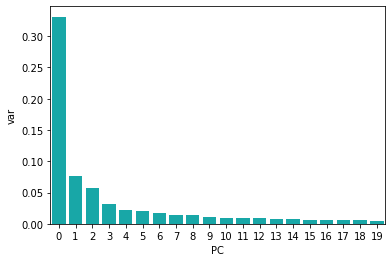

In [6]:
PC = np.arange(50)
df = pd.DataFrame({'var':pca.explained_variance_ratio_[:20],
             'PC':PC[:20]})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

Above barplot shows the variance of first 20 Principal Components. Since the value after the 20th component is very low, we visualize the variance for first 20 components only. The highest value of explained variance is 0.38 which decreases exponentially further until the variance of the 20th component becomes around 0.01. The variance of the components beyond 20 is around the same value of 0.01

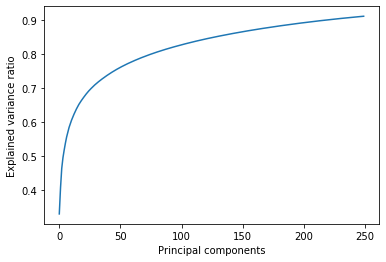

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio');

Above plot shows the Explained Variance ratio for the Principal Components. We have extracted 250 principal components i.e components for 250 dimensions, for the dataset. In order to analyze the numbers of dimensions that are required to adequately represent the data, we can take a look at the above plot. The variance ratio for first 50 principal components is around 0.75, which means that these components alone can represent our data with 75% accuracy. This number increases to around 0.80 if we consider first 100 principal components. We have calculated 250 Principal Components which give us about 90% accuracy while representing the data.<br>So, in conclusion, 250 components are sufficient to adequately represent our data. It is very difficult to get more accurate data by increasing just a few more Principal components. We will need to consider at least 400 Principal components to get 95% accurate representation.<br> So we will just consider 250 components in this project which will represent our data with 90% accuracy

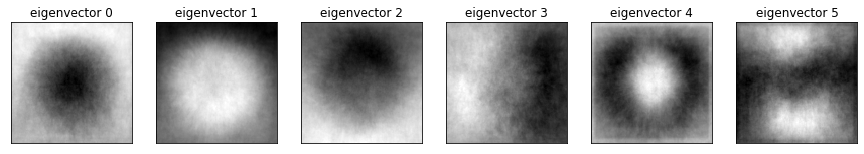

In [8]:
eigenvector_titles = ["eigenvector %d" % i for i in range(eigenvectors.shape[0])]
plot_gallery(eigenvectors, eigenvector_titles, h, w)

In [9]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 300     
X_idx = X1[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

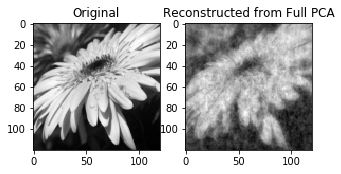

In [10]:
plt.figure(figsize=(5.0,5.0))
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid(False)

Above plot shows the image reconstructed after performing linear dimensionality reduction of the data. As seen, the reconstruction using PCA does not look very good.


## Kernel PCA

Now, we will perform Non-linear dimensionality reduction of the data using Kernel PCA.

In [11]:
%%time
#  depending on sklearn version, THI MAY TAKE A WHILE TO RUN
#   but it shouldn't
from sklearn.decomposition import KernelPCA

n_components = 200
print ("Extracting the top %d eigenvectors from %d faces, ALSO getting inverse transform" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=20, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X1.copy())

Extracting the top 200 eigenvectors from 1000 faces, ALSO getting inverse transform
CPU times: user 5.78 s, sys: 203 ms, total: 5.98 s
Wall time: 3.49 s


We have extracted 200 Principal components using Kernel PCA. 200 components adequately reconstruct our data as can be seen below.

In [12]:
from ipywidgets import widgets
import warnings

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(X1[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X1[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,3,1)
    plt.imshow(X1[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(Labels[idx_to_reconstruct])
    plt.grid()
    
    plt.subplot(1,3,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,250,1),__manual=True)

interactive(children=(IntSlider(value=125, description='idx_to_reconstruct', max=250), Output()), _dom_classes…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

Above plot shows the original image, the image reconstructed using PCA and also the one reconstructed using kPCA.<br>The image reconstructed using PCA is blurred and distorted while that reconstructed using kPCA looks similar to the original image. It is very clear that the images reconstructed using Kernel PCA are much more accurate as compared to that using linear PCA.<br> To compare the accuracy of reconstruction using both these methods, we will calculate the average Mean squared error and structural similarity between these images below.

### Comparison of Dimensionality Reduction Methods

In [13]:
from skimage import measure
import cv2
s = measure.compare_ssim(X1[5].reshape((h, w)),X1[5].reshape((h, w)))
print(s)

1.0


As seen above, the structural similarity index gives a value of 1 if the images are exactly similar. So we will calculate this between original and reconstructed images for all the images and then estimate the average accuracy.

In [14]:
ss1 = ss2 = mm1 = mm2 = 0

def compare_images(idx):
    reconstructed_image_pca = pca.inverse_transform(pca.transform(X1[idx].reshape(1, -1)))
    reconstructed_image_kernelpca = kpca.inverse_transform(kpca.transform(X1[idx].reshape(1, -1)))
    
    err_pca = np.sum((X1[idx] - reconstructed_image_pca) ** 2)
    err_pca /= 1024
    
    err_kpca = np.sum((X1[idx] - reconstructed_image_kernelpca) ** 2)
    err_kpca /= 1024
    
    s1 = measure.compare_ssim(X1[idx,:].reshape((h, w)), reconstructed_image_pca.reshape((h, w)))
    s2 = measure.compare_ssim(X1[idx,:].reshape((h, w)), reconstructed_image_kernelpca.reshape((h, w)))
    
    return [s1,s2,err_pca,err_kpca]

for i in range(len(X1)):
    out = compare_images(i)    
    ss1 += out[0]
    ss2 += out[1]
    mm1 += out[2] 
    mm2 = out[3]
    #print(ss1,ss2)

m1 = mm1/len(X1)
m2 = mm2/len(X1)

s1 = ss1/len(X1)
s2 = ss2/len(X1)

In [15]:
print('Structural Similarity measure between Original and Image reconstructed using PCA is',s1)
print('Structural Similarity measure between Original and Image reconstructed using Kernel PCA is',s2)
print('Mean Squared Error for Original and Image reconstructed using PCA is',m1)
print('Mean Squared Error for Original and Image reconstructed using Kernel PCA is',m2)

Structural Similarity measure between Original and Image reconstructed using PCA is 0.6968841308876531
Structural Similarity measure between Original and Image reconstructed using Kernel PCA is 0.7481491254270065
Mean Squared Error for Original and Image reconstructed using PCA is 0.08388911374967602
Mean Squared Error for Original and Image reconstructed using Kernel PCA is 0.0002729665410122481


We are comparing the representation using non-linear dimensions to using linear dimensions in the above code fragment. As seen above, the average SSIM between the images from original dataset and the images reconstructed using PCA is 0.6954 and that between the images from original dataset and the images reconstructed using Kernel PCA is 0.7533<br>Thus, it is clear that images reconstructed using Kernel PCA are closer to the original in terms of perceived similarity than those reconstructed using PCA.<br>We have also calculated Mean squared error for comparison. It can be seen that MSE value for Original and PCA reconstructed images are 0.0854 but it is just 0.00038 for Images reconstructed using kPCA.<br> Our comparison of both these methods concludes that kPCA is much better for image reconstruction for our dataset.<br> We prefer the Structural Similarity Index method over Mean squared error because it gives us the accuracy in terms of perception and not just in terms of pixel intensity differences. Also, the SSIM ranges from -1 to 1 thus, there is fixed value to show exact similarity or dissimilarity between images. This is not the case for the MSE method. MSE value can go in the range of few thousands for high error. So it becomes difficult to get actual measure of how accurate reconstruction of images is.

## Feature Extraction
### Edge Detection
Detecting edges using Sobel filters, later used in Histogram of oriented gradients.

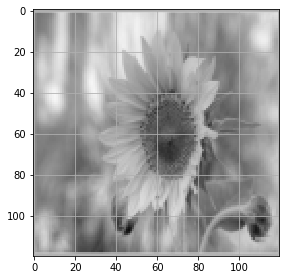

In [16]:
from skimage.io import imshow

idx_to_reconstruct = int(np.random.rand(1)*len(X))
img  = X[idx_to_reconstruct].reshape((h,w))

imshow(img)

plt.grid()
plt.show()

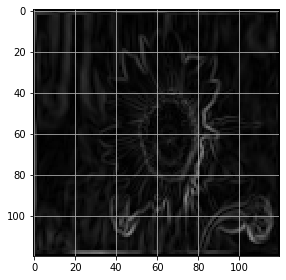

In [17]:
from skimage.filters import sobel_h, sobel_v

gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
imshow(gradient_mag)
plt.grid()
plt.show()

### Daisy Operator
One of the methods used to extract the features is Daisy operator. This method works by extracting features based on localized color intensity histograms along different axes. The Daisy operator relies heavily on the configuration of several hyperparameters.

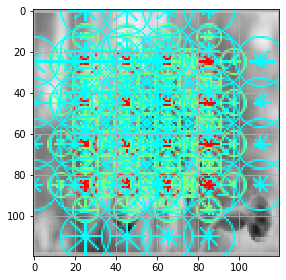

In [18]:
from skimage.feature import daisy

# lets first visualize what the daisy descriptor looks like
features, img_desc = daisy(img,step=20, radius=25, rings=2, histograms=4, orientations=8, visualize=True)
imshow(img_desc)
plt.grid()
plt.show()

In [21]:
features = daisy(img, step=10, radius=25, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(7, 7, 72)
3528


In [22]:
# create a function to take in the row of the matric and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=25, rings=2, histograms=4, orientations=8, visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(h,w))
test_feature.shape

CPU times: user 57.3 ms, sys: 2.48 ms, total: 59.8 ms
Wall time: 58.3 ms


(3528,)

In [23]:
# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)

CPU times: user 52.2 s, sys: 351 ms, total: 52.5 s
Wall time: 53.7 s
(1000, 3528)


In [24]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: user 288 ms, sys: 12.8 ms, total: 301 ms
Wall time: 167 ms


Here, we looked at the heatmap of the pairwise distances of extracted features. Images is ordered from 1 to 1000, with 250 photos a group: Rose, Daisy, Tulip, Sunflowers. If the features are different from each other enough, we can see some grid pattern in the graph.

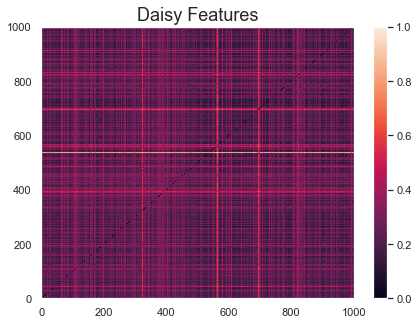

In [36]:
dist_matrix_norm = dist_matrix/dist_matrix.max()
# Plot heat map
import seaborn as sns

cmap = sns.set(style="darkgrid") 
plt.figure(figsize=(7,5))
plt.pcolormesh(dist_matrix_norm,cmap=cmap)
plt.title('Daisy Features',fontsize=18,y=1.)
plt.colorbar()
plt.show()

From the heat map, we can tell that some pattern is created, however not the obvious one. 
We can see outstanding color in the range around 550, which belongs to Tulips class, and less one in the range 350-450 and 800-900 for a Daisy and Tulips classes, respectively.
The not obvious pattern in Daisy features extractor may be caused by the resized images since we resized them to a relatively low dimension.

In [37]:
import copy
matches = 0
match_array = []
for x in range(0, len(X)):
    distances = copy.deepcopy(dist_matrix[x,:]) # get all image diatances
    distances[x] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    if labels[x] == labels[idx2]:
        matches = matches + 1
Daisy_accuracy = matches / len(X)
print("Accuracy for Daisy:",Daisy_accuracy)

Accuracy for Daisy: 0.435


The accuracy of the daisy model is presented above. The accuracy highly depends on the configuration of the parameters in Daisy operator and is also reflected in the heat map.

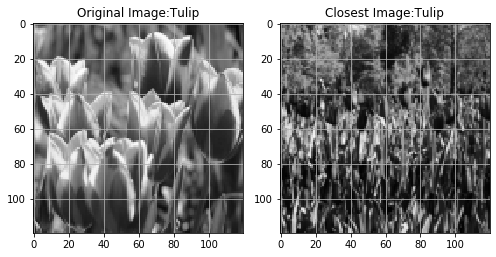

In [26]:
import copy
# find closest image to current image
idx1 = 689
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((h,w)))
plt.title("Original Image:"+labels[idx1])
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((h,w)))
plt.title("Closest Image:"+labels[idx2])
plt.grid()
plt.show()

In [27]:
from ipywidgets import fixed

def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    imshow(X[idx1].reshape((h,w)))
    plt.title("Original Image:" + labels[idx1])
    plt.grid()

    plt.subplot(1,3,2)
    imshow(X[idx2].reshape((h,w)))
    plt.title("Closest Image:"+ labels[idx2])
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(X[idx3].reshape((h,w)))
    plt.title("Next Closest Image:"+ labels[idx3])
    plt.grid()
    plt.show()
widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)

interactive(children=(IntSlider(value=499, description='idx1', max=999), Output()), _dom_classes=('widget-inte…

<function __main__.closest_image(dmat, idx1)>

### Gabor Filter
Gabor filter is a linear filter with a Gaussian kernel which is modulated by a sinusoidal plane wave.

In [40]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from scipy import stats

# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.03, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

            
# compute the filter bank and take statistics of image
def compute_gabor(row, kernels, shape):
    feats = np.zeros((len(kernels), 4), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(row.reshape(shape), kernel, mode='wrap')
        _,_,feats[k,0],feats[k,1],feats[k,2],feats[k,3] = stats.describe(filtered.reshape(-1))
        # mean, var, skew, kurt
        
    return feats.reshape(-1)

idx_to_reconstruct = int(np.random.rand(1)*len(X))

gabr_feature = compute_gabor(X[idx_to_reconstruct], kernels, (h,w))
gabr_feature

array([ 4.60638004e-01,  1.76503572e-02,  2.82958842e-01, -3.38457928e-01,
        1.36457049e-01,  3.53539758e-03,  2.90737900e-01, -4.91659452e-01,
        3.99470970e-01,  5.07681029e-03,  4.31123100e-01, -1.11289366e-01,
        4.49137504e-04,  2.70567347e-04,  6.32533871e-03,  6.67342408e-01,
        4.60638544e-01,  1.76221816e-02,  2.83463549e-01, -3.38558348e-01,
        1.36648223e-01,  2.86728089e-03,  3.09747304e-01, -4.69877830e-01,
        3.95469594e-01,  4.97834412e-03,  4.29598033e-01, -1.21761340e-01,
        7.23393895e-05,  1.38898561e-04,  1.21201095e-02,  5.18619674e-01,
        4.60638004e-01,  1.76421663e-02,  2.83904452e-01, -3.40650311e-01,
        1.36457049e-01,  2.93273965e-03,  4.00514126e-01, -4.19290464e-01,
        3.99470970e-01,  5.19197871e-03,  3.92964398e-01, -1.70212673e-01,
        4.49137504e-04,  1.08433439e-04,  7.76508157e-03,  6.46391447e-01,
        4.60638544e-01,  1.76703107e-02,  2.83400858e-01, -3.40549160e-01,
        1.36648223e-01,  

In [41]:
# takes ~3 minutes to run entire dataset
%time gabor_stats = np.apply_along_axis(compute_gabor, 1, X, kernels, (h,w))
print(gabor_stats.shape)

Wall time: 2min 18s
(1000, 64)


In [42]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix_gabor = pairwise_distances(gabor_stats)

Wall time: 31.8 ms


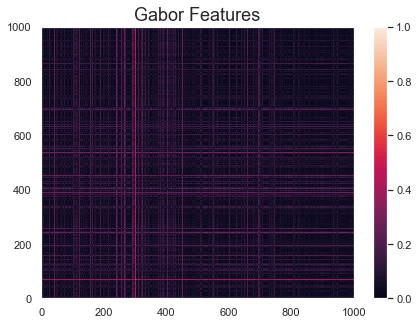

In [43]:
dist_matrix_gabor_norm = dist_matrix_gabor/dist_matrix_gabor.max()
# Plot heat map

cmap = sns.set(style="darkgrid") 
plt.figure(figsize=(7,5))
plt.pcolormesh(dist_matrix_gabor_norm,cmap=cmap)
plt.title('Gabor Features',fontsize=18,y=1.)
plt.colorbar()
plt.show()

For Gabor Features, the uniqueness of Daisy flower class is visible again.

In [44]:
widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix_gabor),__manual=True)
plt.show()

interactive(children=(IntSlider(value=499, description='idx1', max=999), Output()), _dom_classes=('widget-inte…

In [45]:
matches = 0
for x in range(0, len(X)):
    distances = copy.deepcopy(dist_matrix_gabor[x,:]) # get all image diatances
    distances[x] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)

    if labels[x] == labels[idx2]:
        matches = matches + 1
        
Gabor_accuracy = matches / len(X)
print("Accuracy for Gabor:",Gabor_accuracy)

Accuracy for Gabor: 0.352


The gabor filter reduced the feature space to 64 with the cost of accuracy. 

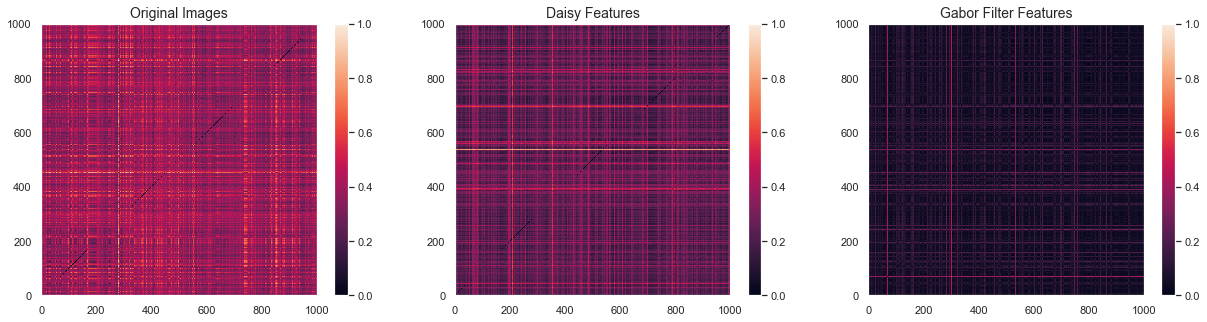

In [46]:
# putting all three heat maps side-by-side for better comparison
dist_matrix_ori = pairwise_distances(X)
dist_matrix_ori_norm = dist_matrix_ori/dist_matrix_ori.max()

sns.set_style('ticks')
plt.figure(figsize=(21,5))
cmap = sns.set(style="darkgrid") 

plt.subplot(1,3,1)
plt.pcolormesh(dist_matrix_ori_norm,cmap=cmap)
plt.title('Original Images',fontsize=14,y=1.)
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(dist_matrix_norm,cmap=cmap)
plt.title('Daisy Features',fontsize=14,y=1.)
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(dist_matrix_gabor_norm,cmap=cmap)
plt.title('Gabor Filter Features',fontsize=14,y=1.)
plt.colorbar()


plt.show()

The comparison of the heatmaps of original image with Daisy and Gabor features. 


### Feature extraction method analysis.

We have used both Daisy operator and Gabor filter on our images for feature extraction.

While visualizing the outputs from both the feature extraction methods, Daisy operator gives more accurate images compared to Gabor operator. For supporting our feature extraction method for being promising for the prediction task, we visualized the differences between statistics of extracted features in each target class.We can Analyze from the statistics that the Accuracy for features extracted by Daisy operator is around 45% for the radius value of 25 whilethat for Gabor filter extraction is around 37%. Hence based on these statistics of extracted features, we can conclude that Daisy operator works better and gives more accurate results for feature extraction of our image set.

From the heat maps above, we can see intuitively that out of the three, Daisy Filter seems to be the most efficient way to distinguishing between classes. This also supports the statement above.

Our model gives promises for the flower recognitions model, however, it has to be trained on the larger variety of the flower classes, which will significantly increase computational time. We can observe similarities in pictures of daisies and sunflowers, which could affect the accuracy. 

### Feature Extraction Using ORB

In [28]:
import os
cv2.__version__

'3.4.1'

We are going to extract features from our images using ORB feature extractor.

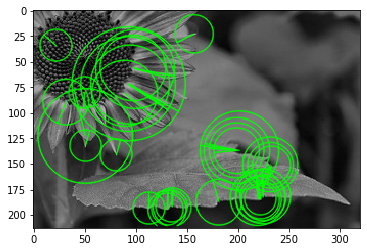

(1000, 800)


In [29]:
keyPoints = []
descriptors = []

for i in range(1000):
    
    img1 = cv2.cvtColor(o_img[i], cv2.COLOR_RGB2GRAY)
    training_gray = img1 

    # Initiate ORB detector
    orb = cv2.ORB_create(nfeatures=30, scoreType=cv2.ORB_FAST_SCORE,edgeThreshold = 15)

    # find the keypoints with ORB
    kp = orb.detect(training_gray,None)

    # compute the descriptors with ORB
    kp, des = orb.detectAndCompute(training_gray, None)
    
    des = des[1:26]
    
    descRow = des.shape[0]
    descCol = des.shape[1]
    
    Desc = des.reshape(descRow*descCol)
    
    keyPoints.append(kp)
    descriptors.append(Desc)
    
    # draw only keypoints location,not size and orientation
    img2 = cv2.drawKeypoints(training_gray, kp, outImage=img,color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Descriptors = np.asarray(descriptors, dtype=np.float32)
plt.imshow(img2), plt.show()
print(Descriptors.shape)


Above plot shows one of the image from our dataset with the features laid on the image.

In [30]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix1 = pairwise_distances(descriptors)

CPU times: user 190 ms, sys: 15.8 ms, total: 205 ms
Wall time: 125 ms


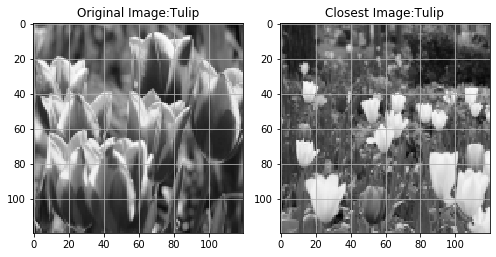

In [31]:
import copy
# find closest image to current image
idx1 = 689
distances = copy.deepcopy(dist_matrix1[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((h,w)))
plt.title("Original Image:"+labels[idx1])
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((h,w)))
plt.title("Closest Image:"+labels[idx2])
plt.grid()
plt.show()

In [32]:
matches = 0
for x in range(0, len(X)):
    distances = copy.deepcopy(dist_matrix1[x,:]) # get all image diatances
    distances[x] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)

    if labels[x] == labels[idx2]:
        matches = matches + 1
        
ORB_accuracy = matches / len(X)
print("Accuracy for ORB:",ORB_accuracy)

Accuracy for ORB: 0.274


As seen above, the accuracy for reconstruction using ORB feature extraction is even lower than all other feature extraction techniques we have done before. The accuracy is just around 30%

In [33]:
def find_matches(idX1,idX2):

    img_1 = cv2.cvtColor(o_img[idX1], cv2.COLOR_RGB2GRAY)
    gray_1 = img_1 
    img_2 = cv2.cvtColor(o_img[idX2], cv2.COLOR_RGB2GRAY)
    gray_2 = img_2

    # Initiate ORB detector
    orb = cv2.ORB_create(nfeatures=1000, scoreType=cv2.ORB_FAST_SCORE,edgeThreshold = 40)

    # compute the descriptors with ORB
    kp_1, des_1 = orb.detectAndCompute(gray_1, None)
    kp_2, des_2 = orb.detectAndCompute(gray_2, None)

    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des_1,des_2)
    
    # Draw first 10 matches.
    img3 = cv2.drawMatches(img_1,kp_1,img_2,kp_2,matches[:20],None, flags=2 ) #cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(10,7))
    plt.imshow(img3)
    
widgets.interact(find_matches,idX1=(0,1000,1),idX2=(0,1000,1),__manual=True)

interactive(children=(IntSlider(value=500, description='idX1', max=1000), IntSlider(value=500, description='id…

<function __main__.find_matches(idX1, idX2)>

We have extracted the matches from the features we extracted before, then shown the matches between two of the images from the dataset, in the above plot.

In [17]:
Matches1 = 0
all_matches1 = []
all_matches2 = []
all_matches3 = []
all_matches4 = []

def find_matches(idX1,idX2):
    img_1 = cv2.cvtColor(o_img[idX1], cv2.COLOR_RGB2GRAY)
    gray_1 = img_1 
    img_2 = cv2.cvtColor(o_img[idX2], cv2.COLOR_RGB2GRAY)
    gray_2 = img_2

    # Initiate ORB detector
    orb = cv2.ORB_create(nfeatures=1000, scoreType=cv2.ORB_FAST_SCORE,edgeThreshold = 40)

    # compute the descriptors with ORB
    kp_1, des_1 = orb.detectAndCompute(gray_1, None)
    kp_2, des_2 = orb.detectAndCompute(gray_2, None)

    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des_1,des_2)
    return(len(matches))
    
for i in range(1000):
    Matches1 = 0
    Matches2 = 0
    Matches3 = 0
    Matches4 = 0
    for j in range(175):
        matches1 = find_matches(i,j)
        Matches1 = Matches1 + matches1
    all_matches1.append(Matches1)
    
    for j in range(175):
        matches2 = find_matches(i,249+j)
        Matches2 = Matches2 + matches2
    all_matches2.append(Matches2)
    
    for j in range(175):
        matches3 = find_matches(i,499+j)
        Matches3 = Matches3 + matches3
    all_matches3.append(Matches3)
    
    for j in range(175):
        matches4 = find_matches(i,749+j)
        Matches4 = Matches4 + matches4
    all_matches4.append(Matches4)


In the above code fragment, we are finding matches between all the images in the dataset. Because of computational time, we were considering 175 images from every class and calculating the matches between each image and all the 175 images from every class. The total count of matches for each image with every class is stored for each of the classes. 

In [18]:
print(all_matches1[5])
print(all_matches2[5])
print(all_matches3[5])
print(all_matches4[5])

36325
34090
36765
36893


Above code shows us the total matches between image at index 5 and all the 4 classes of flowers  

In [26]:
counter = 0
for i in range(1000):
    target_class = ['Rose','Daisy','Tulip','Sunflower']
    Total_matches = []
    Total_matches.append(all_matches1[i])
    Total_matches.append(all_matches2[i])
    Total_matches.append(all_matches3[i])
    Total_matches.append(all_matches4[i])
    id_target = Total_matches.index(max(Total_matches))
    if target_class[id_target] == labels[i]:
        counter = counter + 1
        
print("Actual class is of last flower is Sunflower")
print("Predicted class is",target_class[id_target])
Accuracy = counter/1000
print("Accuracy is",Accuracy)

Actual class is of last flower is Sunflower
Predicted class is Sunflower
Accuracy is 0.02


We then compare the total count of matches of each image for every class. Then classify the image to the class that has highest matches.<br>
We have also calculated the accuracy for this classification task. The accuracy with this type of matching is very low as seen above and thus we do not recommended using ORB feature matching to classify or recognize the flowers.

## Nearest Neighbor Classifier

In [52]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths
import argparse
import imutils

In [53]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Descriptors,labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
def predict(idx1):
    #idx1 = 800
    img1 = cv2.cvtColor(o_img[idx1], cv2.COLOR_RGB2GRAY)
    test_gray = img1 

    # Initiate ORB detector
    orb = cv2.ORB_create(nfeatures=30, scoreType=cv2.ORB_FAST_SCORE,edgeThreshold = 15)

    # find the keypoints with ORB
    kp = orb.detect(test_gray,None)

    # compute the descriptors with ORB
    kp, des = orb.detectAndCompute(test_gray, None)
    
    des = des[1:26]
    descRow = des.shape[0]
    descCol = des.shape[1]
    
    Desc = des.reshape(descRow*descCol)
    Descriptor = np.asarray(Desc, dtype=np.float32)
    
    pred = model.predict(Descriptor.reshape(1, -1))[0]
    return pred.title()

In [55]:
def plot_NN(idx_to_reconstruct):
    idx1 = idx_to_reconstruct
    image = X[idx1].reshape((h,w))
    predict_title = predict(idx1)
    imshow(image)
    plt.grid()
    plt.show()
    print(' Actual flower:',labels[idx1] ,' Predicted flower:', predict_title)


widgets.interact(plot_NN,idx_to_reconstruct=(0,1000,1),__manual=True)


interactive(children=(IntSlider(value=500, description='idx_to_reconstruct', max=1000), Output()), _dom_classe…

<function __main__.plot_NN(idx_to_reconstruct)>

We have built Nearest Neighbor classifier in order to classify our images according to their labels. For this task, the features we extracted using ORB extractor are given as the input to the KNN classifier. It fits the features and the corresponding labels of each of the image to the model and then predicts the label when we supply it the features of the image to be predicted.<br>As seen above, the classifier is able to predict the label of the given image correctly.

### References:
based on: Eric Larson's course at SMU, Fall 2019, https://github.com/eclarson/MachineLearningNotebooks